# Activity: Perform multiple linear regression


## Introduction

### To address the business's request, you'll conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1. Relevant Imports

### Import packages

First, import relevant Python libraries and modules.

In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm


### Load dataset

Load the dataset `marketing_and_sales_data.csv` as `data` and display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab.

In [2]:
# Load the data
marketing = pd.read_csv("marketing_sales_data.csv")
marketing.head(10)


# Display the first five rows

### YOUR CODE HERE ### 



,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
5,Low,5.561586,3.530209,Nano,39.992087
6,Medium,13.951808,4.477142,Micro,147.150178
7,Medium,28.352592,4.695376,Mega,229.141912
8,Medium,15.322175,4.379750,Macro,222.696768
9,High,26.914287,6.074165,Mega,322.466797


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

#### **QUESTION 1: What are some purposes of EDA before constructing a multiple linear regression model?**
1. To ubderstand the characteristics of the data: size, data types. How big is it? What data types are there? How many features are there? What kind of label is there?
2. To see a Summary statistics of the datasets: what’s the mean, the median, the quantiles, to understand the scale and range of variables
3. detect errors and outliers.



## Step 2. Data Exploration

First, create a pairplot to visualize the relationship between the continous variables in `data`.

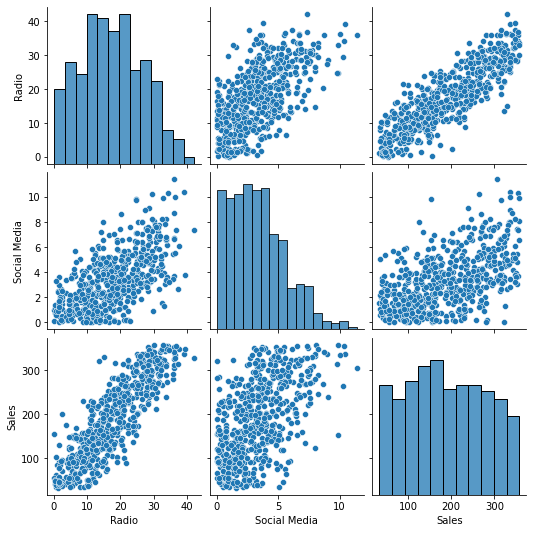

In [3]:
# Create a pairplot of the data

sns.pairplot(marketing)



<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

You can refer back to the material where creating a pairplot is demonstrated.

</details>


<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

There is a function in the `seaborn` library that allows you to create a pairplot showing the relationships between variables in the data.

</details>


<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

Use the `pairplot()` function from the `seaborn` library and pass in the entire dataframe.

</details>


#### **QUESTION 2: Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the plot above?**


Radio has a linear relationship with Sales. TV and INfluencer are expempted because they are Categorical variables

### Categorical variables

There are two categorical variables, `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in`Influencer`. 

In [4]:
# Calculate the mean Sales for each TV category 

marketing.groupby("TV")['Sales'].mean()


TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

In [5]:
# Calculate the mean Sales for each Influencer category 
marketing.groupby("Influencer")['Sales'].mean()

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

Find the mean `Sales` when the `TV` promotion is `High`, `Medium`, or `Low`.
    
Find the mean `Sales` when the `Influencer` promotion is `Macro`, `Mega`, `Micro`, or `Nano`.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

The `groupby` operation in `pandas` can be used to split an object (e.g., data) into groups and apply a calculation to each group.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

To calculate the mean `Sales` for each `TV` category, group by `TV`, select the `Sales` column, then calculate the mean. 
    
The same logic will apply for calculating the mean `Sales` for each `Influencer` category.

</details>

#### **QUESTION 3: What do you notice about the categorical variables? Could they be useful predictors of `Sales`?**



The TV categories show that High promotion budget had the highest mean, while for the influencer, a Mega influencer had the highest mean. these information could be useful in ptredicting Sales.

### Removing missing data

As you discovered in prior labs, this dataset contains rows with missing values. 

To correct this, drop all rows in the data that contain missing data.

In [6]:
# Drop rows that contain missing data and update the dataframe

marketing.dropna(axis = 0)



,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266
568,High,28.110171,7.358169,Mega,297.626731
569,Medium,11.401084,5.818697,Nano,145.416851
570,Medium,21.119991,5.703028,Macro,209.326830


<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

Use `data.dropna(axis=0)` to drop all rows with missing values in `data`. Be sure to properly update the dataframe.

</details>

### Cleaning column names

The `ols()` function doesn't run when variable names contain a space. 

Check the column names in `data` do not contain spaces and fix the column names if needed.

In [7]:
# Rename all columns in data that contain a space 

marketing.columns = ["TV", "Radio", "Social_Media", "Influencer", "Sales"]
marketing



,TV,Radio,Social_Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266
568,High,28.110171,7.358169,Mega,297.626731
569,Medium,11.401084,5.818697,Nano,145.416851
570,Medium,21.119991,5.703028,Macro,209.326830


<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

There is one column name that contains a space. Look for it in `data`.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

The `Social Media` column name in `data` contains a space, which is not allowed in the `ols()` function.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

Use the `rename()` function in `pandas` and use the `columns` argument to provide a new name for `Social Media`.

</details>

## Step 3. Model Building

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [8]:
# Define the OLS formula

ols_formula = "Sales ~ C(TV) + Radio + Social_Media + C(Influencer)"
ols_formula


'Sales ~ C(TV) + Radio + Social_Media + C(Influencer)'

In [9]:
# Create an OLS model

OLS = ols(formula = ols_formula, data = marketing)
OLS


In [10]:
# Fit the model

model = OLS.fit()
model

In [11]:
# Save the results summary
summary = model.summary()

In [12]:
# Display the model results

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.82e-282
Time:                        22:09:05   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                217.4784      6.584     33.031      0.000     204.546     230.411
C(TV)[T.Low]            -154.5736      4.949    -31.231      0.000    -164.295    -144.852
C(TV)[T.Medium]          -75.5947      3.647    -20.726      0.000     -82.759     -68.431
C(Influencer)[T.Mega]      2.4948      3.462      0.721      0.471      -4.305       9.295
C(Influencer)[T.Micro]     2.9391      3.378      0.870      0.385      -3.695       9.574
C(Influencer)[T.Nano]      0.8015      3.346      0.240      0.811      -5.770       7.373
Radio                      2.9735      0.235     12.644      0.000       2.512       3.435
Social_Media              -0.1391      0.676     -0.206      0.837      -1.467       1.189
==============================================================================
Omnibus:                       58.711   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.802
Skew:                           0.057   Prob(JB):                     0.000136
Kurtosis:                       2.143   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

You may find it helpful to refer back to the materials that discuss model building for linear regression. 

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

Use the `ols()` function imported earlier, which creates a model from a formula and dataframe, to create an OLS model.

</details>


<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

You previously learned how to specify in `ols()` that a feature is categorical. 
    
Be sure the string names for the independent variables exactly match the column names in `data`.

</details>

#### **QUESTION 4: Which independent variables did you choose for the model, and why?**



the independent variables choosen are TV, Radio, Influencer vecause they can all be used to predict Sales

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: *multicollinearity*. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model Assumption - Linearity

Create scatterplots comparing the continuous independent variable(s) you selected above with `Sales` to check the linearity assumption.

**Note:** You can use the pairplot you created earlier to verify the linearity assumption or you can create new scatterplots comparing the variables of interest.

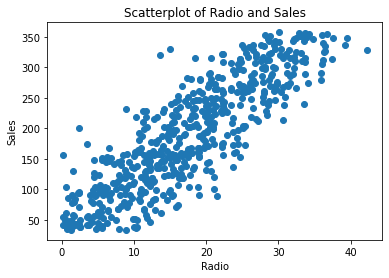

In [13]:
# Create a scatterplot for each independent variable and the dependent variable

plt.scatter(marketing["Radio"], marketing["Sales"])
plt.title("Scatterplot of Radio and Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()



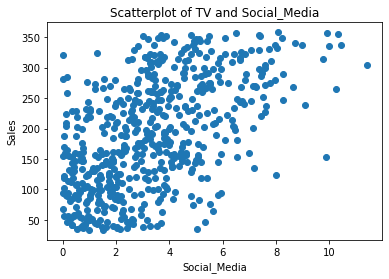

In [14]:
plt.scatter(marketing["Social_Media"], marketing["Sales"])
plt.title("Scatterplot of TV and Social_Media")
plt.xlabel("Social_Media")
plt.ylabel("Sales")
plt.show()

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

There is a function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

Use the `scatterplot()` function in `seaborn`.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>
    
Pass the independent and dependent variables in your model as the arguments for `x` and `y`, respectively, in the `scatterplot()` function. Do this for each continous independent variable in your model.

</details>

#### **QUESTION 5: Is the linearity assumption met?**
The linearity assumption was met as the independent vaiables have a linear relationship with the dependent variable


### Model Assumption - Independence

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model Assumption - Normality

Create the following plots to check the normality assumption:
* **Plot 1**: Histogram of the residuals
* **Plot 2**: QQ plot of the residuals

In [15]:
# Calculate the residuals
residuals = model.resid

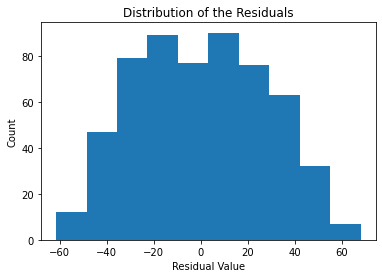

In [16]:
# Create a histogram with the residuals 
residuals = model.resid

plt.hist(residuals)
plt.title("Distribution of the Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Count")
plt.show()

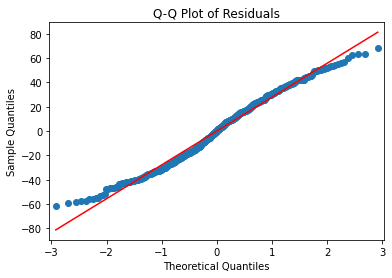

In [17]:
# Create a QQ plot of the residuals
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

You can access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

#### **QUESTION 6: Is the normality assumption met?**



YES because the histogram shows a bell shape and the points on the QQ plot appear to be on a straight line 

### Model Assumption - Constant Variance

Check the constant variance assumption is not violated by creating a scatter plot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

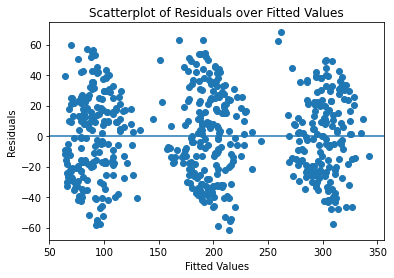

In [25]:
# Create a scatter plot with the fitted values from the model and the residuals
X = marketing[["TV", "Radio", "Social_Media", "Influencer"]]
fitted_values = model.predict(X)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

plt.scatter(fitted_values, residuals)
plt.axhline(0)
plt.title("Scatterplot of Residuals over Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()



<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

You can access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from a fit model called `model`.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

#### **QUESTION 7: Is the homoscedasticity assumption met?**




YES this is because the variance where there are fitted values is similarly distributed, indicating equal or similar variance

### Model Assumption - Multicollinearity

The *no multicollinearity* assumption states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:
* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

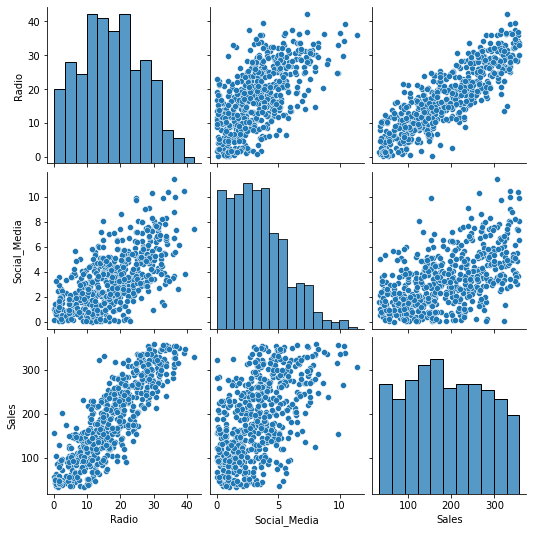

In [26]:
# Create a pairplot of the data

sns.pairplot(marketing)



In [ ]:
# Calculate the variance inflation factor (optional)

### YOUR CODE HERE ### 



<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

Refer to the material where creating plots for check the no multicollinearity assumption was introduced.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

The `pairplot()` function applied earlier to `data` plots the relationship between all continous variables, e.g., between `Radio` and `Social Media`.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

The `statsmodels` library has a function to calculate the variance inflation factor called `variance_inflation_factor()`. 
    
When using this function, subset the data to only include the continous independent variables, i.e., `Radio` and `Social Media`. Refer to external tutorials on how to apply the variance inflation factor function mentioned above.
 

</details>

#### **QUESTION 8: Is the no multicollinearity assumption met?**



## Step 4. Results and Evaluation

If the linearity assumptions are met, the model results can be appropriately interpreted.

First, display the OLS Regression Results.

In [36]:
# Display the model results summary

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.82e-282
Time:                        23:12:55   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                217.4784      6.584     33.031      0.000     204.546     230.411
C(TV)[T.Low]            -154.5736      4.949    -31.231      0.000    -164.295    -144.852
C(TV)[T.Medium]          -75.5947      3.647    -20.726      0.000     -82.759     -68.431
C(Influencer)[T.Mega]      2.4948      3.462      0.721      0.471      -4.305       9.295
C(Influencer)[T.Micro]     2.9391      3.378      0.870      0.385      -3.695       9.574
C(Influencer)[T.Nano]      0.8015      3.346      0.240      0.811      -5.770       7.373
Radio                      2.9735      0.235     12.644      0.000       2.512       3.435
Social_Media              -0.1391      0.676     -0.206      0.837      -1.467       1.189
==============================================================================
Omnibus:                       58.711   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.802
Skew:                           0.057   Prob(JB):                     0.000136
Kurtosis:                       2.143   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **QUESTION 9:  What is your interpretation of the model's R-squared?**



R squared is = 0.904. this means that 90.4% of the variation in Sales is explained by the model.

### Interpreting model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS Regression Results.

In [37]:
# Display the model results summary

model.summary() 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.82e-282
Time:                        23:19:19   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                217.4784      6.584     33.031      0.000     204.546     230.411
C(TV)[T.Low]            -154.5736      4.949    -31.231      0.000    -164.295    -144.852
C(TV)[T.Medium]          -75.5947      3.647    -20.726      0.000     -82.759     -68.431
C(Influencer)[T.Mega]      2.4948      3.462      0.721      0.471      -4.305       9.295
C(Influencer)[T.Micro]     2.9391      3.378      0.870      0.385      -3.695       9.574
C(Influencer)[T.Nano]      0.8015      3.346      0.240      0.811      -5.770       7.373
Radio                      2.9735      0.235     12.644      0.000       2.512       3.435
Social_Media              -0.1391      0.676     -0.206      0.837      -1.467       1.189
==============================================================================
Omnibus:                       58.711   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.802
Skew:                           0.057   Prob(JB):                     0.000136
Kurtosis:                       2.143   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **QUESTION 10: What are the model coefficients?**



- Intercept = 217.4784
- TV = -154.5736(low), -75.5947(medium)
- Radio = 2.9735
- Social_media = -0.1391	
- Influencer = 2.4948 (Mega), 2.9391 (Micro), 0.8015(Nano)

#### **QUESTION 11: How would you write the relationship between `Sales` and the independent variables as a linear equation?**



Sales = 217.4784 -75.5947 TV + 2.9735 Radio - 0.1391 Social_media + 2.4948 Influencer

#### **QUESTION 12: What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?**



- Radio: if radio is increased by 1 unit, sales will increase by 2.9735, the p-value 0.000 is less than 0.05. therefore it is statistically significant.
- TV: If TV increases by 1 unit, Sales will decrease by 75.5947, the p-value 0.000 is less than 0.05. therefore it is statistically significant.
- Social_media: if Social_media increses by 1 unit, Sales will reduce by 0.1391,  the p-value 0.837 is greater than 0.05. therefore it is not statistically significant 
- Influencer: if Influencer increases by 1 unit, Sales will increase by 2.4948, the p-values are greater than 0.05, therefore, the result is not statistically significant.

#### **QUESTION 13: Why is it important to interpret the beta coefficients?**



The beta coeficients shows which of the independent variables has the most influene on the dependent variable

#### **QUESTION 14: What are you interested in exploring based on your model?**



i am interested in knowing the the method of advert that will best increase Sales

#### **QUESTION 15: Do you think your model could be improved? Why or why not? How?**




The model could be improved as some of the independent variables have p-values greater than 0.05 

## Conclusion

**What are the key takeaways from this lab?**
- Sales can be increased by advertising

**What results can be presented from this lab?**
- Radio has the greatest influence on Sales among the independent variables

**How would you frame your findings to external stakeholders?**
- Based on the results obtained, more investments should be made in Radio advert as it drives more sales than the others.

#### **References**

Saragih, H.S. *Dummy Marketing and Sales Data*. https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data.